In [8]:
! pip install psycopg2

DEPRECATION: Loading egg at c:\users\cd net\appdata\local\programs\python\python312\lib\site-packages\simple_calculator-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import psycopg2
import pandas as pd

In [11]:
try:
    cur = con.cursor()
except psycopg2.Error as e:
    print("Error: Couldn't get cursor to the database")
    print(e)

In [12]:
con.set_session(autocommit=True)

In [18]:
cur.close()

In [19]:
try:
    cur = con.cursor()
except psycopg2.Error as e:
    print("Error: Couldn't get cursor to the database")
    print(e)

In [20]:
con.set_session(autocommit=True)

In [21]:
try:
    cur.execute("create database accounts")
except psycopg2.Error as e:
    print(e)

database "accounts" already exists



In [22]:
try:
    con = psycopg2.connect(host='127.0.0.1', dbname='accounts', user='postgres', password='12345')
except psycopg2.Error as e:
    print("Error: Couldn't make connection")
    print(e)

In [23]:

AccountsCountry=pd.read_csv('D:/ITI - data engineering/Project 1 Dataengineering/Dataset/Wealth-AccountsCountry.csv')

In [25]:
AccountsCountry=AccountsCountry.rename(columns={'Code':'Country Code'})

In [26]:
AccountsCountry_Clean=AccountsCountry[['Country Code','Short Name','Table Name','Long Name','Currency Unit']]

In [27]:
AccountsCountry_Clean.head()

,Country Code,Short Name,Table Name,Long Name,Currency Unit
0,ALB,Albania,Albania,Republic of Albania,Albanian lek
1,ARG,Argentina,Argentina,Argentine Republic,Argentine peso
2,ARM,Armenia,Armenia,Republic of Armenia,Armenian dram
3,AUS,Australia,Australia,Commonwealth of Australia,Australian dollar
4,AUT,Austria,Austria,Republic of Austria,Euro


In [28]:
AccountsData=pd.read_csv('D:/ITI - data engineering/Project 1 Dataengineering/Dataset/Wealth-AccountData.csv')

In [157]:
AccountsData.head(5)

,Country Name,Country Code,Indicator Code,Series Code,1995,2005,2010,2014
0,Albania,ALB,Human capital (constant 2018 US$),NW.HCA.TO,4.49E+10,5.440000e+10,6.810000e+10,7.250000e+10
1,Albania,ALB,Human capital per capita (constant 2018 US$),NW.HCA.PC,14072.79,1.807230e+04,2.336286e+04,2.509002e+04
2,Albania,ALB,"Human capital per capita, employed female (con...",NW.HCA.FEMP.PC,3468.858,2.222115e+03,2.889150e+03,2.957420e+03
3,Albania,ALB,"Human capital per capita, employed male (const...",NW.HCA.MEMP.PC,6507.931,1.168935e+04,1.578992e+04,1.699138e+04
4,Albania,ALB,"Human capital per capita, female (constant 201...",NW.HCA.FEMA.PC,4893.006,2.886736e+03,3.613606e+03,3.719608e+03


In [30]:
AccountsData.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]'],
      dtype='object')

In [31]:
AccountsData=AccountsData[['Country Name', 'Country Code', 'Series Name', 'Series Code','1995 [YR1995]','2005 [YR2005]','2010 [YR2010]','2014 [YR2014]',]]

In [66]:
AccountsData=AccountsData.rename(columns={'Series Name':'Indicator Name','Series code':'Indicator Code','1995 [YR1995]''':1995,'2000 [YR2000]':2000,'2005 [YR2005]':2005,'2010 [YR2010]':2010,'2014 [YR2014]':2014})

In [56]:
AccountsSeries=pd.read_csv('D:/ITI - data engineering/Project 1 Dataengineering/Dataset/Wealth-AccountSeries.csv')

In [156]:
AccountsSeries.head(3)

,Series Code,Topic,Indicator Name,Sort Defination
0,NW.HCA.TO,Human capital,Human capital (constant 2018 US$),NaN
1,NW.HCA.PC,Human capital,Human capital per capita (constant 2018 US$),NaN
2,NW.HCA.FEMP.PC,Human capital,"Human capital per capita, employed female (con...",NaN


In [61]:
AccountsSeries=AccountsSeries[['Code','Topic','Indicator Name','Previous Indicator Name']]

In [65]:
AccountsSeries=AccountsSeries.rename(columns={'Code':'Series Code' ,'Previous Indicator Name': 'Sort Defination'})

In [37]:
songplay_tablecreate = ("""Create table IF NOT EXISTS accountscountry(
country_code VARCHAR PRIMARY KEY ,
short_name VARCHAR,
table_name VARCHAR,
long_name VARCHAR,
currency_unit VARCHAR)
""")


In [38]:
cur.execute(songplay_tablecreate)
con.commit()

In [39]:
accounts_data_table_create = """
CREATE TABLE IF NOT EXISTS accountsdata (
    indicator_name VARCHAR PRIMARY KEY,
    country_code VARCHAR,
    Series_Code VARCHAR,
    year_1995 NUMERIC,
    year_2005 NUMERIC,
    year_2010 NUMERIC,
    year_2014 NUMERIC,
    FOREIGN KEY (country_code) REFERENCES accountscountry(country_code)
);

"""


In [40]:
cur.execute(accounts_data_table_create)
con.commit()

In [41]:
accountseries_data_table_create = """
CREATE TABLE IF NOT EXISTS accountsseries (
    series_code VARCHAR PRIMARY KEY,
    topic VARCHAR,
    indicator_name VARCHAR,
    short_definition VARCHAR,
    FOREIGN KEY (indicator_name) REFERENCES accountsdata(indicator_name)

)
"""


In [42]:
cur.execute(accountseries_data_table_create)
con.commit()

In [43]:
accounts_table_country_insert = """
INSERT INTO accountscountry (
    country_code,
    short_name,
    table_name,
    long_name,
    currency_unit
) VALUES (%s, %s, %s, %s, %s)
"""


In [44]:
for i,row in AccountsCountry_Clean.iterrows():
    cur.execute(accounts_table_country_insert,list(row))

UniqueViolation: duplicate key value violates unique constraint "accountscountry_pkey"
DETAIL:  Key (country_code)=(ALB) already exists.


In [45]:
con.commit()

In [155]:
try:
  cur.execute("Select * from accountscountry limit 5 ;")
except psycopg2.Error as e:
  print("ERROR : Issue in select table") 
  print(e)
row = cur.fetchone()
while row:
  print(row)
  row = cur.fetchone()

('ALB', 'Albania', 'Albania', 'Republic of Albania', 'Albanian lek')
('ARG', 'Argentina', 'Argentina', 'Argentine Republic', 'Argentine peso')
('ARM', 'Armenia', 'Armenia', 'Republic of Armenia', 'Armenian dram')
('AUS', 'Australia', 'Australia', 'Commonwealth of Australia', 'Australian dollar')
('AUT', 'Austria', 'Austria', 'Republic of Austria', 'Euro')


In [79]:
AccountsCountry_Clean.head(5)

,Country Code,Short Name,Table Name,Long Name,Currency Unit
0,ALB,Albania,Albania,Republic of Albania,Albanian lek
1,ARG,Argentina,Argentina,Argentine Republic,Argentine peso
2,ARM,Armenia,Armenia,Republic of Armenia,Armenian dram
3,AUS,Australia,Australia,Commonwealth of Australia,Australian dollar
4,AUT,Austria,Austria,Republic of Austria,Euro


*****EDA*****

In [80]:
print(AccountsCountry_Clean.info())  
print(AccountsCountry_Clean.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Code   7592 non-null   object
 1   Short Name     146 non-null    object
 2   Table Name     146 non-null    object
 3   Long Name      7594 non-null   object
 4   Currency Unit  146 non-null    object
dtypes: object(5)
memory usage: 296.9+ KB
None
       Country Code Short Name Table Name Long Name Currency Unit
count          7592        146        146      7594           146
unique          146        146        146       268           115
top             LBN    Albania    Albania     Japan          Euro
freq             53          1          1        53            18


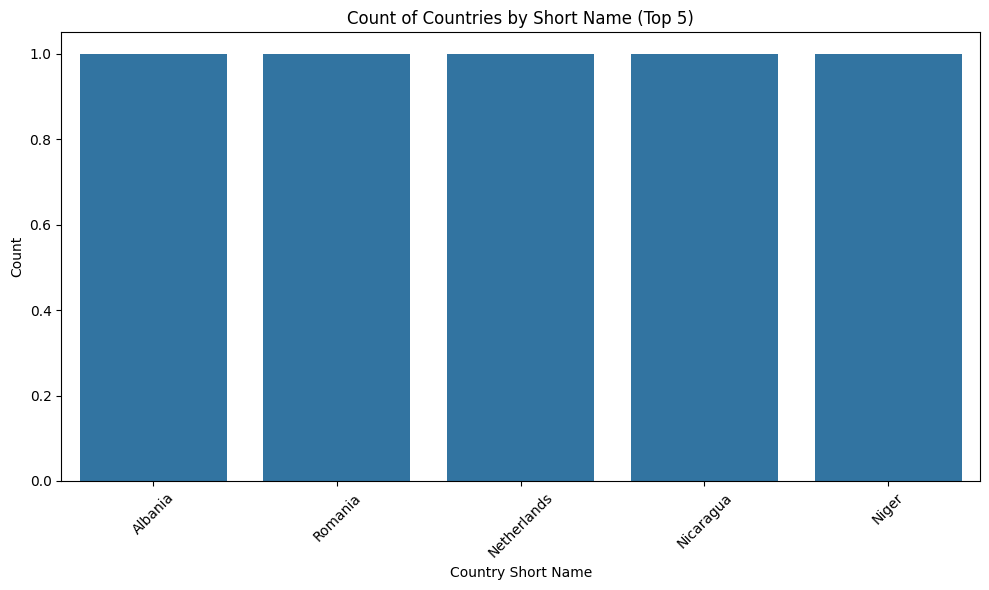

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = AccountsCountry_Clean['Short Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index,
            y=top_countries.values)
plt.title('Count of Countries by Short Name (Top 5)')
plt.xlabel('Country Short Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





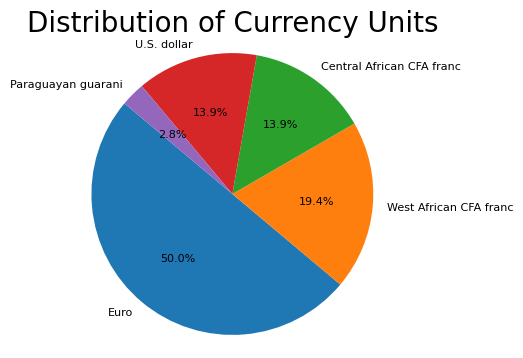

In [113]:
top_Currancy = AccountsCountry_Clean['Currency Unit'].value_counts().head(5)

plt.figure(figsize=(4, 4))  # Adjust figure size

# Plot pie chart
wedges, texts, autotexts = plt.pie(top_Currancy, labels=top_Currancy.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})

plt.title('Distribution of Currency Units', fontsize=20)  
plt.axis('equal')  
plt.show()

C:\Users\CD NET\AppData\Local\Temp\ipykernel_4216\1649540042.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Currency Unit', data=currency_counts, palette='viridis', alpha=0.8)


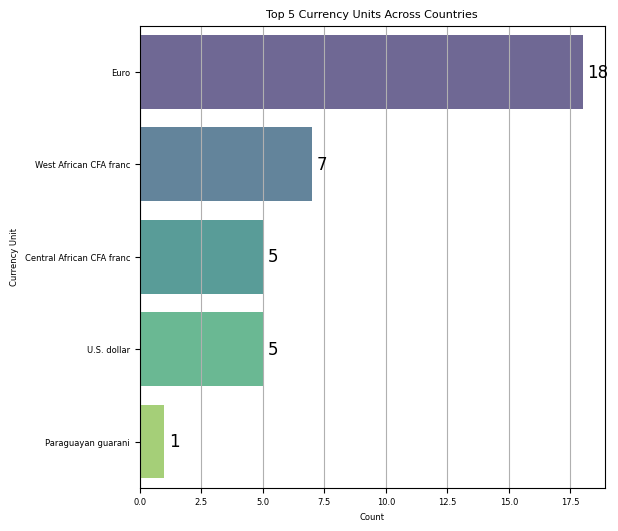

In [126]:


# Assuming AccountsCountry_Clean is your DataFrame
currency_counts = AccountsCountry_Clean['Currency Unit'].value_counts().head(5).reset_index()
currency_counts.columns = ['Currency Unit', 'Count']  # Rename columns for clarity

plt.figure(figsize=(6, 6))

# Plot using Seaborn barplot with customized palette
sns.barplot(x='Count', y='Currency Unit', data=currency_counts, palette='viridis', alpha=0.8)

plt.title('Top 5 Currency Units Across Countries', fontsize=8)
plt.xlabel('Count', fontsize=6)
plt.ylabel('Currency Unit', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid(axis='x')  # Show grid only on x-axis

# Annotate bars with values
for index, value in enumerate(currency_counts['Count']):
    plt.text(value + 0.2, index, str(value), fontsize=12, va='center')



In [69]:
AccountsData.head()


,Country Name,Country Code,Indicator Code,Series Code,1995,2005,2010,2014
0,Albania,ALB,Human capital (constant 2018 US$),NW.HCA.TO,4.49E+10,5.440000e+10,6.810000e+10,7.250000e+10
1,Albania,ALB,Human capital per capita (constant 2018 US$),NW.HCA.PC,14072.79,1.807230e+04,2.336286e+04,2.509002e+04
2,Albania,ALB,"Human capital per capita, employed female (con...",NW.HCA.FEMP.PC,3468.858,2.222115e+03,2.889150e+03,2.957420e+03
3,Albania,ALB,"Human capital per capita, employed male (const...",NW.HCA.MEMP.PC,6507.931,1.168935e+04,1.578992e+04,1.699138e+04
4,Albania,ALB,"Human capital per capita, female (constant 201...",NW.HCA.FEMA.PC,4893.006,2.886736e+03,3.613606e+03,3.719608e+03


In [70]:
AccountsSeries.head()

,Series Code,Topic,Indicator Name,Sort Defination
0,NW.HCA.TO,Human capital,Human capital (constant 2018 US$),NaN
1,NW.HCA.PC,Human capital,Human capital per capita (constant 2018 US$),NaN
2,NW.HCA.FEMP.PC,Human capital,"Human capital per capita, employed female (con...",NaN
3,NW.HCA.MEMP.PC,Human capital,"Human capital per capita, employed male (const...",NaN
4,NW.HCA.FEMA.PC,Human capital,"Human capital per capita, female (constant 201...",NaN


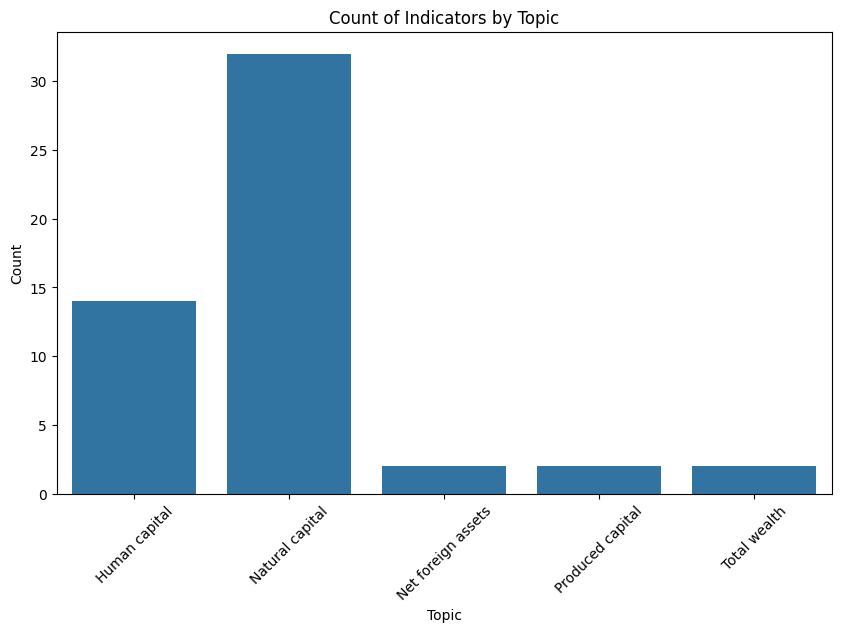

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Topic
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', data=AccountsSeries)
plt.title('Count of Indicators by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


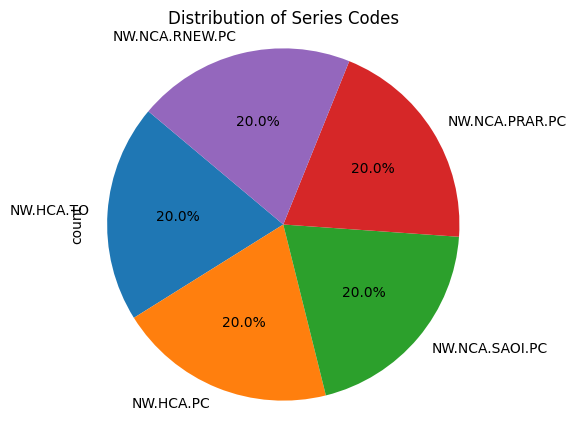

In [148]:
# Pie chart for distribution of Series Codes
plt.figure(figsize=(5,5))
Topp=AccountsSeries['Series Code'].value_counts().head(5)
Topp.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Series Codes')
plt.axis('equal')
plt.show()


In [72]:
try:
    cur.execute("SELECT * FROM accountscountry LIMIT 10;")
except psycopg2.Error as e:
    print("ERROR: Issue selecting data from accountsdata table")
    print(e)
rows = cur.fetchall()
for row in rows:
    print(row)


('ALB', 'Albania', 'Albania', 'Republic of Albania', 'Albanian lek')
('ARG', 'Argentina', 'Argentina', 'Argentine Republic', 'Argentine peso')
('ARM', 'Armenia', 'Armenia', 'Republic of Armenia', 'Armenian dram')
('AUS', 'Australia', 'Australia', 'Commonwealth of Australia', 'Australian dollar')
('AUT', 'Austria', 'Austria', 'Republic of Austria', 'Euro')
('AZE', 'Azerbaijan', 'Azerbaijan', 'Republic of Azerbaijan', 'New Azeri manat')
('BHR', 'Bahrain', 'Bahrain', 'Kingdom of Bahrain', 'Bahraini dinar')
('BGD', 'Bangladesh', 'Bangladesh', "People's Republic of Bangladesh", 'Bangladeshi taka')
('BLR', 'Belarus', 'Belarus', 'Republic of Belarus', 'Belarusian rubel')
('BEL', 'Belgium', 'Belgium', 'Kingdom of Belgium', 'Euro')
